# Activity: Run simple linear regression

## **Introduction**


As you're learning, simple linear regression is a way to model the relationship between two variables. By assessing the direction and magnitude of a relationship, data professionals are able to uncover patterns and transform large amounts of data into valuable knowledge. This enables them to make better predictions and decisions. 

In this lab, you are part of an analytics team that provides insights about your company's sales and marketing practices. You have been assigned to a project that focuses on the use of influencer marketing. For this task, you will explore the relationship between your radio promotion budget and your sales. 

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

## **Step 1: Imports** 


Import relevant Python libraries and modules.

In [2]:
# Import relevant Python libraries and modules.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

The dataset provided is a .csv file (named `marketing_sales_data.csv`), which contains information about marketing conducted in collaboration with influencers, along with corresponding sales. Assume that the numerical variables in the data are expressed in millions of dollars. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

**Note:** This is a fictional dataset that was created for educational purposes and modified for this lab. 

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
data = pd.read_csv("marketing_sales_data.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `pandas` library that allows you to read data from a .csv file and load the data into a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `read_csv()` function from the `pandas` library. 

</details>

## **Step 2: Data exploration** 


To get a sense of what the data includes, display the first 10 rows of the data.

In [4]:
# Display the first 10 rows of the data.

data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `head()` function from the `pandas` library. 

</details>

**Question:** What do you observe about the different variables included in the data?

At a first glance, it seems that the variables contain only floats and objects, no integers. This was confirmed below using .dtypes:

In [5]:
print(data.dtypes)

TV               object
Radio           float64
Social Media    float64
Influencer       object
Sales           float64
dtype: object


Next, to get a sense of the size of the dataset, identify the number of rows and the number of columns.

In [6]:
# Display number of rows, number of columns.

data.shape


(572, 5)

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

There is a property in every DataFrame in `pandas` that gives you access to the number of rows and the number of columns as a tuple.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `shape` property.

</details>

**Question:** How many rows and columns exist in the data?

There are 572 rows and 5 columns in the data.

Now, check for missing values in the rows of the data. This is important because missing values are not that meaningful when modeling the relationship between two variables. To do so, begin by getting Booleans that indicate whether each value in the data is missing. Then, check both columns and rows for missing values.

In [7]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.

data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


If you would like to read more about the `isna()` function, refer to its documentation in the references section of this lab.

In [8]:
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.

data.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

If you would like to read more about the `any()` function, refer to its documentation in the references section of this lab.

In [9]:
# Use .sum() to get the number of rows that contain missing values.

data.isnull().any(axis=1).sum()


np.int64(3)

If you would like to read more about the `sum()` function, refer to its documentation in the references section of this lab.

**Question:** How many rows containing missing values?

There are at three rows that have at least a missing value.

Next, drop the rows that contain missing values. Data cleaning makes your data more usable for analysis and regression. Then, check to make sure that the resulting data does not contain any rows with missing values.

In [10]:
# Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped. To update the DataFrame, reassign it to the result.

data.dropna(axis=0)
data = data.dropna(axis=0)


In [11]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.
# Use .sum() to get the number of rows that contain missing values


data.isna()


,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [12]:
data.isnull().any(axis=1)


0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 569, dtype: bool

In [13]:
data.isnull().any(axis=1).sum()

np.int64(0)

The next step for this task is checking model assumptions. To explore the relationship between radio promotion budget and sales, model the relationship using linear regression. Begin by confirming whether the model assumptions for linear regression can be made in this context. 

**Note:** Some of the assumptions can be addressed before the model is built. These will be addressed in this section. After the model is built, you will finish checking the assumptions.

Create a plot of pairwise relationships in the data. This will help you visualize the relationships and check model assumptions. 

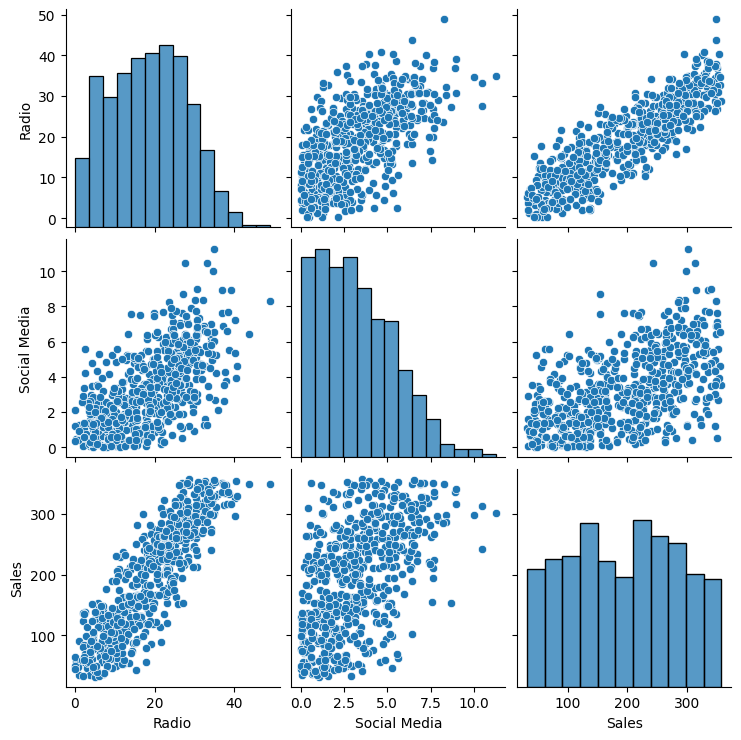

In [14]:
# Create plot of pairwise relationships.
sns.pairplot(data)



<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `seaborn` library that you can call to create a plot that shows the 
  relationships between pairs of variables.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `pairplot()` function from the `seaborn` library.

</details>

**Question:** Is the assumption of linearity met?

Yes, there might be a linear relationship between Sales and Radio.

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  Use the scatterplot of `Sales` over `Radio` found in the preceding plot of pairwise relationships. 

</details>

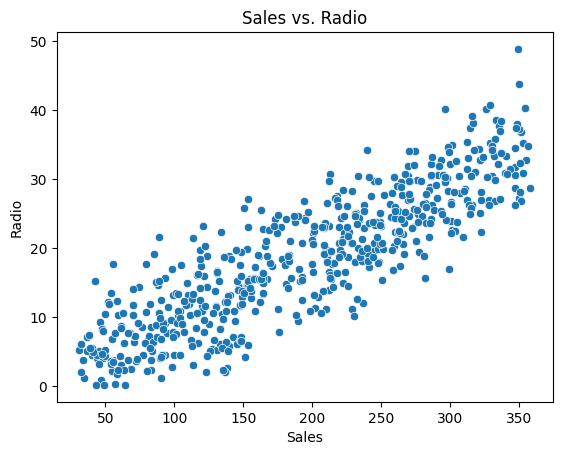

In [15]:
sns.scatterplot(data=data, x="Sales", y="Radio")
plt.title("Sales vs. Radio")
plt.show()


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  Check the scatterplot of `Sales` over `Radio` found in the plot of pairwise relationships. If the data points cluster around a line, that indicates that the assumption of linearity is met. Alternatively, if the data points resemble a random cloud or a curve, then a linear model may not fit the data.  

</details>

## **Step 3: Model building** 

Select only the columns that are needed for the model.

In [16]:
# Select relevant columns.
# Save resulting DataFrame in a separate variable to prepare for regression.

ols_data = data[["Sales", "Radio"]]


In [17]:
from statsmodels.formula.api import ols

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  Use two pairs of square brackets around the names of the columns that should be selected.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  Make sure column names are spelled exactly as they are in the data.

</details>

Now, display the first 10 rows of the new DataFrame to better understand the data.

In [18]:
# Display first 10 rows of the new DataFrame.

ols_data.head(10)

,Sales,Radio
0,90.054222,1.218354
1,222.741668,14.949791
2,102.774790,10.377258
3,328.239378,26.469274
4,351.807328,36.876302
5,261.966812,25.561910
6,349.861575,37.263819
7,140.415286,13.187256
8,264.592233,29.520170
9,55.674214,3.773287


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to display the first n number of rows of a DataFrame, where n is a number of your choice.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  Call the `head()` function from the `pandas` library and pass in the number of rows from the top that you want to display. 

</details>

Next, write the linear regression formula for modeling the relationship between the two variables of interest.

In [19]:
# Write the linear regression formula.
# Save it in a variable.

ols_formula = "Sales ~ Radio"



<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  Save the formula as string.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  Use a tilde to separate the y variable from the x variable so that the computer understands which is which. Make sure the spelling of each variable exactly matches the corresponding column from the data.

</details>

Now, implement the ordinary least squares (OLS) approach for linear regression.

In [20]:
# Implement OLS.

OLS = ols(formula = ols_formula, data = ols_data)


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to implement OLS.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  You can call the `ols()` function from the `statsmodels` library.

</details>

Now, create a linear regression model for the data and fit the model to the data.

In [21]:
# Fit the model to the data.
# Save the fitted model in a variable.

OLS = ols(formula = ols_formula, data = ols_data)

model = OLS.fit()

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to fit the model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `fit()` function from the `statsmodels` library.

</details>

## **Step 4: Results and evaluation** 


Begin by getting a summary of the results from the model.

In [22]:
# Get summary of results.

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Wed, 15 Oct 2025   Prob (F-statistic):          2.07e-176
Time:                        15:42:42   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to get the summary of results from a model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `summary()` function from the `statsmodels` library.

</details>

Next, analyze the bottom table from the results summary. Based on the table, identify the coefficients that the model determined would generate the line of best fit. The coefficients are the y-intercept and the slope. 

**Question:** What is the y-intercept? 

Intercept: 41.5326
The y-intercept is the predicted value of the dependable variable.

**Question:** What is the slope? 

Radio: 8.1733
The slope is the line that tells us the direction between the 2 variables. In this case, it tells us how much Sales increased with radio promotions.


**Question:** What linear equation would you write to express the relationship between sales and radio promotion budget? Use the form of y = slope * x + y-intercept? 


Sales = 8.1733 * Radio + 41.5326

**Question:** What does the slope mean in this context?

The slope represents the independent variable/the predictor variable.
In this context, it shows the fact that everytime Radio increases, Sales increase by 8,1733 per unit (Radio).

Now that you've built the linear regression model and fit it to the data, finish checking the model assumptions. This will help confirm your findings. First, plot the OLS data with the best fit regression line.

<Axes: xlabel='Sales', ylabel='Radio'>

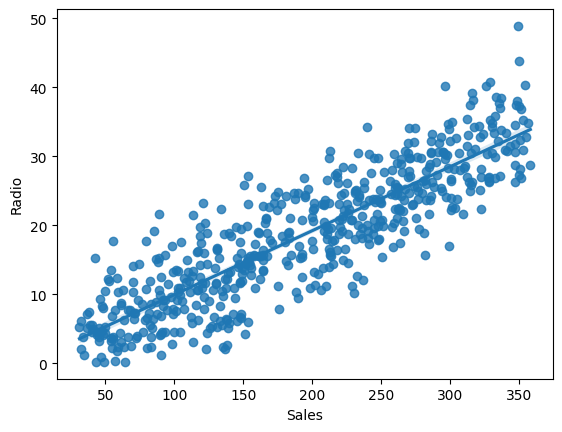

In [23]:
# Plot the OLS data with the best fit regression line.

sns.regplot(x = "Sales", y = "Radio", data = ols_data)


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be useful here.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `regplot()` function from the `seaborn` library.

</details>

**Question:** What do you observe from the preceding regression plot?

There is a visible regression line in the new regression plot.

Now, check the normality assumption. Get the residuals from the model.

In [24]:
# Get the residuals from the model.
ols_formula = "Sales ~ Radio"
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()


residuals = model.resid





<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is an attribute from the `statsmodels` library that can be called to get the residuals from a fitted model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `resid` attribute from the `statsmodels` library.

</details>

Now, visualize the distribution of the residuals.

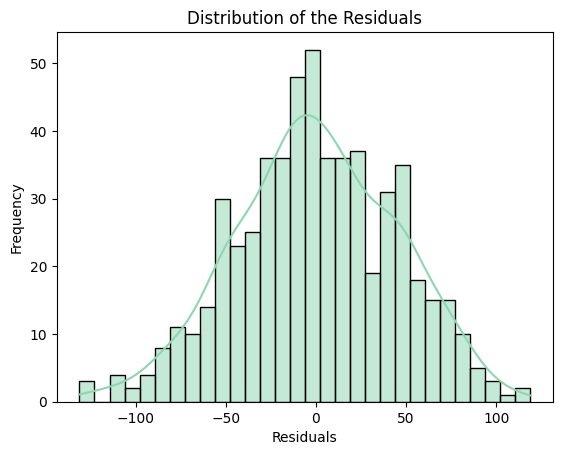

In [25]:
# Visualize the distribution of the residuals.



sns.histplot(residuals, kde=True, color="#8ad7b0", bins=30)
plt.title("Distribution of the Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be called to create a histogram.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `histplot()` function from the `seaborn` library.

</details>

**Question:** Based on the visualization, what do you observe about the distribution of the residuals?

The distribution is almost normal.

**Question:** Is the assumption of normality met?

Yes, it is.

Now, check the assumptions of independent observation and homoscedasticity. Start by getting the fitted values from the model.

In [26]:
# Get fitted values.

fitted_values = model.predict(ols_data)


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to calculate fitted values from the model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `predict()` function from the `statsmodels` library. Make sure to pass in the column from `ols_data` corresponding to the x variable.

</details>

Next, create a scatterplot of the residuals against the fitted values.

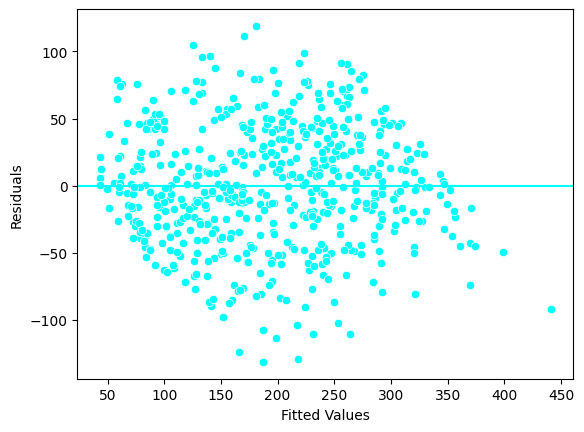

In [35]:
# Create a scatterplot of residuals against fitted values.


fig = sns.scatterplot(x=fitted_values, y=residuals, color ="cyan")

fig.axhline(0, color="cyan")


fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

plt.show()




<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be called to create a scatterplot.

</details>

<details>
  <summary><h4>Hint 3</h4></summary>

Call the `scatterplot()` function from the `seaborn` library.

</details>

**Question:** Are the assumptions of independent observation and homoscedasticity met?


At a first look, yes, these assumptions seem to be met. 


## **Considerations**

**What are some key takeaways that you learned during this lab?**

I've learnt the logical step to build a regression model and the importance of cleaning the data and checking for missing values first.

I know now about what y-intercept and slope are and what their use is.

Also: the ways in which I can look for the assumptions of linearity, normality independence of observation, homoscedasticity.

I did some research and to doublecheck, I could use:
   -for homoscedasticity - Breusch-Pagan or White test
   -for independence of observation - Durbin-Watson test
   -for linearity - Rainbow Test     

   statsmodels library provides models for doing these tests.


**How would you present your findings from this lab to others?**

I would focus very much on visual representations and less on the depth of the work behind getting to these results.

I would show them the plot that displays visibly an increase in sales when applying radio promotions.

Then, I will show them the gaussian distribution histogram and explain to them that this bell shape shows our model passes the statistical tests for being used as a regression model and it actually supports our findings.

Lastly, I would present the real impact of actually implementing it: helping a company, for eg, to take a decision based on this model, increse the budget of radio promotions and, in turn, get more money from having more sales.

**What summary would you provide to stakeholders?**


We wanted to see if and which marketing strategy works best to increase our sales: TV, radio, social media.

We cleaned our data, made sure no missing values that could hinder us were present and searched for correlations between our Sales variable and all the channels mentioned previously: TV, radio, social media.

It looks like there is a positive relationship between Sales and Radio.

We wanted to see if we raised our radio promotions our sales will increase too. For being able to do this, we chose a regression model, which basically checks if a variable increases or decreases, another one increases/decreases at the same time, proportionally.

We usually look at 4 things to check if our regression model truly measures what was set to measure:

1. Linearity: in this plot, there is a visible upwards line, it shows the relationship between Sales and Radio is a positive one and as Radio prmotions increase, so does Sales.

2. Independence of observations: we make sure each data point (or row from the data set that represents an observation) is unrelated to others. This also showcasts the importance of inspecting the data, filtering and cleaning first. If we would have had a dublicate row, then our data would have been skewed and the model would have been affected.

3. Normality: this bell shape histogram attests our model is accurate to the statistical tests needed to be implemented in a regression model.

4. Homoscedasticity: the "Residual VS Fitted values" scatterplot shows us how observations are spread across 0 value. There is no pattern, so the assumption is met, thus our model performs consistent across data.

All these these findings, insights, results and visual representations determine us to conclude that our linear regression model is well fitted, all four assumptions are met, and sales actually increase with radio promotions. Thus, if we were to promote our marketing campaign across radio we will get more money than if we used as a channel of propagation TV or social media.





**References**

[Pandas.DataFrame.Any — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html)

[Pandas.DataFrame.Isna — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)

[Pandas.Series.Sum — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.Series.sum.html)

[Saragih, H.S. *Dummy Marketing and Sales Data*.](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)